In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [178]:
import pandas as pd

# Load the data
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

# Merge on 'uid', keeping all rows from train_labels
data = pd.merge(train_features, train_labels, on='uid', how='right')

# Check for duplicate uids in train_labels and ensure duplication in train_features
# `train_features` should be duplicated if multiple rows exist for the same uid in `train_labels`.
data.set_index('uid', inplace=True)

# Sort values to ensure duplicates align correctly
data.sort_index(inplace=True)

# Check the result
print("Data preview with possible duplicate rows:")
data.head()


Data preview with possible duplicate rows:


,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,adl_walk_03,...,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,year,composite_score
uid,,,,,,,,,,,,,,,,,,,,,
aace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,175
aanz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,206
aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,161
aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2021,144
aard,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2021,104


In [130]:
data

,age_03,urban_03,married_03,n_mar_03,edu_gru_03,n_living_child_03,migration_03,glob_hlth_03,adl_dress_03,adl_walk_03,...,rsocact_m_12,rrelgwk_12,a16a_12,a21_12,a22_12,a33b_12,a34_12,j11_12,year,composite_score
uid,,,,,,,,,,,,,,,,,,,,,
aace,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.Never,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,175
aanz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.Almost every day,0.No,NaN,NaN,NaN,NaN,NaN,Concrete 2,2021,206
aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2016,161
aape,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.4 or more times a week,0.No,NaN,NaN,NaN,NaN,NaN,"Wood, mosaic, or other covering 1",2021,144
aard,1. 50–59,"1. 100,000+",3. Widowed,1.0,3. 7–9 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2021,104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zzag,1. 50–59,"0. <100,000",1. Married or in civil union,1.0,1. 1–5 years,4. 7+,0.0,5. Poor,0.0,0.0,...,4.Once a week,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2021,152
zzci,1. 50–59,"0. <100,000",3. Widowed,1.0,1. 1–5 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2016,140
zzci,1. 50–59,"0. <100,000",3. Widowed,1.0,1. 1–5 years,1. 1 or 2,0.0,4. Fair,0.0,0.0,...,9.Never,1.Yes,NaN,NaN,NaN,NaN,No 2,Concrete 2,2021,121


In [179]:
df = data.copy()
X = df.drop(columns=['composite_score'])  # Drop unique identifier
y = df['composite_score']  # Replace 'target' with the actual label column name


In [132]:
df.isnull().sum()

age_03             1456
urban_03           1454
married_03         1454
n_mar_03           1482
edu_gru_03         1468
                   ... 
a33b_12            4288
a34_12             1601
j11_12               89
year                  0
composite_score       0
Length: 185, dtype: int64

In [133]:
kolom = data.columns
kolom[0]

'age_03'

In [134]:
null = df.isnull().sum()

for idx, total in enumerate(null):
    print(f'{kolom[idx]} -  {total}')

age_03 -  1456
urban_03 -  1454
married_03 -  1454
n_mar_03 -  1482
edu_gru_03 -  1468
n_living_child_03 -  1471
migration_03 -  1456
glob_hlth_03 -  1622
adl_dress_03 -  1621
adl_walk_03 -  1463
adl_bath_03 -  1463
adl_eat_03 -  1465
adl_bed_03 -  1463
adl_toilet_03 -  1463
n_adl_03 -  1465
iadl_money_03 -  1621
iadl_meds_03 -  1621
iadl_shop_03 -  1621
iadl_meals_03 -  1621
n_iadl_03 -  1621
depressed_03 -  1625
hard_03 -  1622
restless_03 -  1622
happy_03 -  1629
lonely_03 -  1622
enjoy_03 -  1629
sad_03 -  1621
tired_03 -  1621
energetic_03 -  1630
n_depr_03 -  1628
cesd_depressed_03 -  1628
hypertension_03 -  1454
diabetes_03 -  1454
resp_ill_03 -  1454
arthritis_03 -  1454
hrt_attack_03 -  1456
stroke_03 -  1454
cancer_03 -  1454
n_illnesses_03 -  1456
bmi_03 -  2302
exer_3xwk_03 -  1621
alcohol_03 -  1456
tobacco_03 -  1455
test_chol_03 -  1628
test_tuber_03 -  1635
test_diab_03 -  1623
test_pres_03 -  1623
hosp_03 -  1454
visit_med_03 -  1458
out_proc_03 -  1454
visit_dental_03

In [175]:
X = df.drop(columns='composite_score')

In [181]:
X['decis_personal_03'].unique()

array([nan,  1.,  2.,  3.])

In [184]:
X['decis_famil_03'].isnull().sum()

np.int64(2297)

In [135]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocessing for y (target)
y_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply preprocessing to X
X_transformed = preprocessor.fit_transform(X)

# Apply MinMaxScaler to y
y_reshaped = y.values.reshape(-1, 1)  # Reshape y to a 2D array for scaler
y_transformed = y_scaler.fit_transform(y_reshaped)

# Outputs
print("Transformed X (features):", X_transformed)
print("Transformed y (target):", y_transformed)


Transformed X (features): [[0.2 0.  0.  ... 1.  0.  0. ]
 [0.2 0.  0.  ... 1.  0.  0. ]
 [0.2 0.  0.  ... 0.  0.  1. ]
 ...
 [0.2 0.  0.  ... 1.  0.  0. ]
 [0.2 0.  0.  ... 1.  0.  0. ]
 [0.6 0.  0.  ... 1.  0.  0. ]]
Transformed y (target): [[0.51818182]
 [0.61212121]
 [0.47575758]
 ...
 [0.35454545]
 [0.08484848]
 [0.43333333]]


e:\project\MLComp\.venv\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                             Model       RMSE
12          Hist Gradient Boosting  37.403962
8                    Random Forest  37.481871
6   Support Vector Regressor (SVR)  38.164062
9                Gradient Boosting  39.319794
5                   Bayesian Ridge  39.764856
1                            Ridge  40.489502
4                  Huber Regressor  40.505536
0                Linear Regression  41.476571
11                        AdaBoost  43.813430
13           K-Neighbors Regressor  44.444863
10                     Extra Trees  45.944499
14                   MLP Regressor  49.283126
7                    Decision Tree  52.212355
3                       ElasticNet  59.036278
2                            Lasso  59.036278


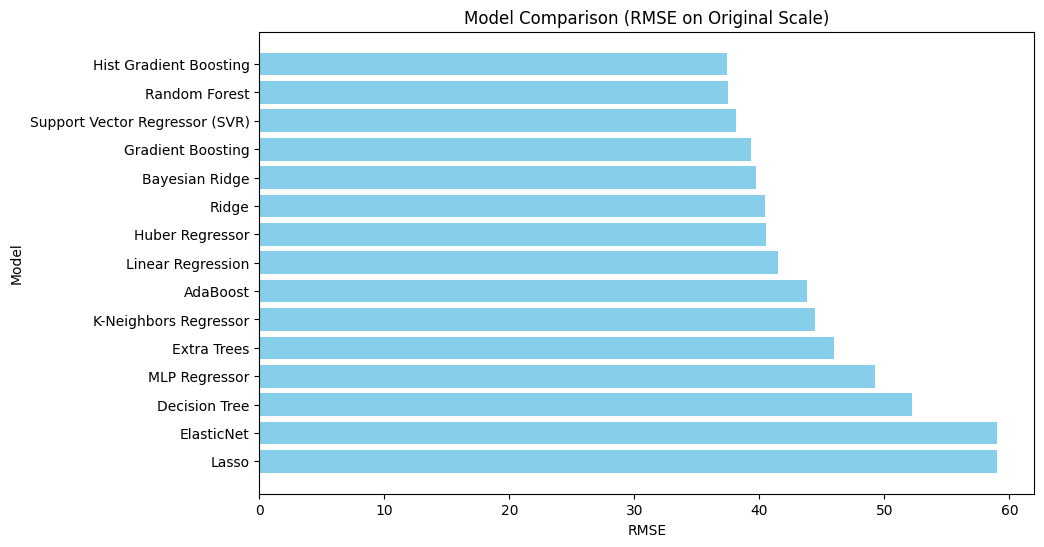

In [102]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, BayesianRidge
)
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Huber Regressor': HuberRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Support Vector Regressor (SVR)': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}

# Initialize results list
results = []

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train.ravel())  # Flatten target for training
    # Predict on validation data
    y_pred_scaled = model.predict(X_val)
    # Inverse transform predictions and true values to their original scale
    y_pred_original = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_val_original = y_scaler.inverse_transform(y_val.reshape(-1, 1))
    # Calculate RMSE in original scale
    rmse = np.sqrt(mean_squared_error(y_val_original, y_pred_original))
    # Append results
    results.append({'Model': model_name, 'RMSE': rmse})

# Create a DataFrame for results and sort by RMSE
results_df = pd.DataFrame(results).sort_values(by='RMSE')

# Display results
print(results_df)

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('Model Comparison (RMSE on Original Scale)')
plt.gca().invert_yaxis()
plt.show()


In [67]:
print(len(feature_importance_df))
def print_row(row):
    print(f"Feature: {row['Feature']}, Importance: {row['Importance']}")

# Iterating over rows using apply()
feature_importance_df.apply(print_row, axis=1)

340
Feature: edu_gru_12_0. No education, Importance: 0.15596485858873269
Feature: edu_gru_12_1. 1–5 years, Importance: 0.1390406661823731
Feature: edu_gru_12_4. 10+ years, Importance: 0.04516552302904255
Feature: edu_gru_12_2. 6 years, Importance: 0.04290544080503501
Feature: edu_gru_12_3. 7–9 years, Importance: 0.02755601457886082
Feature: hincome_03, Importance: 0.01731112675139842
Feature: hincome_12, Importance: 0.015042643538458054
Feature: age_12_1. 50–59, Importance: 0.01309635547946583
Feature: age_12_4. 80+, Importance: 0.010199986698840773
Feature: n_depr_12, Importance: 0.009853966892687556
Feature: age_03_1. 50–59, Importance: 0.00956526950932082
Feature: rjob_hrswk_12, Importance: 0.009366984870570307
Feature: age_03_3. 70–79, Importance: 0.009093608290407219
Feature: rjob_hrswk_03, Importance: 0.008558711956219439
Feature: reads_12, Importance: 0.008135234979446038
Feature: age_03_2. 60–69, Importance: 0.007998395624238243
Feature: games_12, Importance: 0.0073922230448504

189    None
190    None
193    None
191    None
192    None
       ... 
326    None
329    None
254    None
330    None
332    None
Length: 340, dtype: object

# Submission

In [76]:
# Load test features and submission format
test_features = pd.read_csv('test_features.csv')
submission_format = pd.read_csv('submission_format.csv')
print(len(test_features), len(submission_format))

# Merge on 'uid', keeping all rows from train_labels
pred_data = pd.merge(test_features, submission_format, on='uid', how='right')
print(len(pred_data))

819 1105
1105


In [79]:

# Preprocess the test features using the same preprocessor
test_features_transformed = preprocessor.transform(pred_data)

# Use the best model (Hist Gradient Boosting) to predict the composite score
best_model = models['Random Forest']
predictions_scaled = best_model.predict(test_features_transformed)

# Inverse transform predictions to the original scale
predictions_original = np.rint(y_scaler.inverse_transform(predictions_scaled.reshape(-1, 1))).astype('int64')
print(predictions_original)
# Prepare the submission dataframe
submission_format['composite_score'] = predictions_original.flatten()

# Save the submission dataframe to a CSV file
submission_format.to_csv('submission_1.csv', index=False)

print("Submission file 'submission_1.csv' created successfully!")


[[194]
 [188]
 [183]
 ...
 [192]
 [178]
 [169]]
Submission file 'submission.csv' created successfully!


First RMSE score is 41.5

Use deep learning

In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Define the advanced PyTorch model
class AdvancedRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(AdvancedRegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.1),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

# Preprocess data
X_transformed = torch.tensor(X_transformed, dtype=torch.float32)
y_transformed = torch.tensor(y_transformed, dtype=torch.float32)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_transformed, y_transformed, test_size=0.2, random_state=42
)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = AdvancedRegressionModel(input_size)

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# Training the model
epochs = 100
best_val_loss = float('inf')
early_stop_counter = 0
patience = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y.squeeze())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y.squeeze())
            val_loss += loss.item()

    # Adjust learning rate
    scheduler.step(val_loss / len(val_loader))

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
    else:
        early_stop_counter += 1

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")

    if early_stop_counter >= patience:
        print("Early stopping triggered.")
        break

# Load the best model for evaluation
model.load_state_dict(torch.load("best_model.pth"))

# Evaluate the model on validation set
model.eval()
y_val_pred_scaled = []
y_val_true = []

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        outputs = model(batch_X).squeeze()
        y_val_pred_scaled.extend(outputs.numpy())
        y_val_true.extend(batch_y.numpy())

# Inverse transform predictions and true values
y_val_pred_original = y_scaler.inverse_transform(np.array(y_val_pred_scaled).reshape(-1, 1))
y_val_original = y_scaler.inverse_transform(np.array(y_val_true).reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val_original, y_val_pred_original))
print(f"Validation RMSE: {rmse:.4f}")


C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_28408\3200067953.py:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_transformed = torch.tensor(X_transformed, dtype=torch.float32)
C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_28408\3200067953.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_transformed = torch.tensor(y_transformed, dtype=torch.float32)
e:\project\MLComp\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100, Training Loss: 0.1867, Validation Loss: 0.0440
Epoch 2/100, Training Loss: 0.0581, Validation Loss: 0.0255
Epoch 3/100, Training Loss: 0.0363, Validation Loss: 0.0196
Epoch 4/100, Training Loss: 0.0274, Validation Loss: 0.0187
Epoch 5/100, Training Loss: 0.0242, Validation Loss: 0.0168
Epoch 6/100, Training Loss: 0.0214, Validation Loss: 0.0165
Epoch 7/100, Training Loss: 0.0189, Validation Loss: 0.0160
Epoch 8/100, Training Loss: 0.0182, Validation Loss: 0.0158
Epoch 9/100, Training Loss: 0.0168, Validation Loss: 0.0154
Epoch 10/100, Training Loss: 0.0163, Validation Loss: 0.0152
Epoch 11/100, Training Loss: 0.0152, Validation Loss: 0.0152
Epoch 12/100, Training Loss: 0.0147, Validation Loss: 0.0146
Epoch 13/100, Training Loss: 0.0150, Validation Loss: 0.0146
Epoch 14/100, Training Loss: 0.0138, Validation Loss: 0.0144
Epoch 15/100, Training Loss: 0.0135, Validation Loss: 0.0148
Epoch 16/100, Training Loss: 0.0136, Validation Loss: 0.0153
Epoch 17/100, Training Loss: 0.01

C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_28408\3200067953.py:102: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


In [83]:
# Submission
# Preprocess test features
input_size = X_train.shape[1]
model = AdvancedRegressionModel(input_size)
model.load_state_dict(torch.load("best_model.pth"))
test_features_transformed = preprocessor.transform(pred_data)
test_features_tensor = torch.tensor(test_features_transformed, dtype=torch.float32)

# Predict on test data
model.eval()
test_predictions_scaled = model(test_features_tensor).detach().numpy()
test_predictions_original = np.rint(y_scaler.inverse_transform(test_predictions_scaled)).astype('int64')

# Prepare the submission dataframe
submission_format['composite_score'] = test_predictions_original.flatten()
submission_format.to_csv('submission_2.csv', index=False)
print("Submission file 'submission_2.csv' created successfully!")


Submission file 'submission_2.csv' created successfully!


RMSE 39. Cek feature importance

Optimized pipeline and deep learning

In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import KNNImputer

# Numerical Preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),  # Use KNN for missing values
    #('poly', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)),  # Add interactions
    ('scaler', MinMaxScaler())
])

# Categorical Preprocessing
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocess y (target variable)
y_scaler = MinMaxScaler(feature_range=(0, 1))

# Transform X and y
X_transformed = preprocessor.fit_transform(X)
y_reshaped = y.values.reshape(-1, 1)
y_transformed = y_scaler.fit_transform(y_reshaped)


In [95]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class OptimizedRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(OptimizedRegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.LeakyReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.BatchNorm1d(64),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.model(x)

# Prepare data
X_transformed = torch.tensor(X_transformed, dtype=torch.float32).to(device)
y_transformed = torch.tensor(y_transformed, dtype=torch.float32).to(device)

X_train, X_val, y_train, y_val = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# Initialize model, loss, optimizer
input_size = X_train.shape[1]
model = OptimizedRegressionModel(input_size).to(device)  # Move model to GPU
criterion = nn.SmoothL1Loss()  # Robust to outliers
optimizer = optim.AdamW(model.parameters(), lr=0.0005)

# Scheduler for learning rate
scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=10, T_mult=2)

# Training with Early Stopping
epochs = 200
best_val_loss = float('inf')
patience = 15
early_stop_counter = 0

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y.squeeze())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move data to GPU
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y.squeeze())
            val_loss += loss.item()

    scheduler.step()
    val_loss /= len(val_loader)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss:.4f}")

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "optimized_best_model.pth")
    else:
        early_stop_counter += 1

    # if early_stop_counter >= patience:
    #     print("Early stopping triggered.")
    #     break

# Load and evaluate best model
model.load_state_dict(torch.load("optimized_best_model.pth"))
model.eval()

# Predictions and evaluation
y_val_pred_scaled = []
y_val_true = []

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)  # Move data to GPU
        outputs = model(batch_X).squeeze()
        y_val_pred_scaled.extend(outputs.cpu().numpy())  # Move to CPU for further processing
        y_val_true.extend(batch_y.cpu().numpy())

# Inverse scaling
y_val_pred_original = y_scaler.inverse_transform(np.array(y_val_pred_scaled).reshape(-1, 1))
y_val_original = y_scaler.inverse_transform(np.array(y_val_true).reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val_original, y_val_pred_original))
print(f"Validation RMSE: {rmse:.4f}")


Using device: cuda
Epoch 1/200, Training Loss: 0.1523, Validation Loss: 0.0736
Epoch 2/200, Training Loss: 0.0779, Validation Loss: 0.0492
Epoch 3/200, Training Loss: 0.0478, Validation Loss: 0.0293
Epoch 4/200, Training Loss: 0.0342, Validation Loss: 0.0216
Epoch 5/200, Training Loss: 0.0241, Validation Loss: 0.0169
Epoch 6/200, Training Loss: 0.0200, Validation Loss: 0.0151
Epoch 7/200, Training Loss: 0.0179, Validation Loss: 0.0133
Epoch 8/200, Training Loss: 0.0163, Validation Loss: 0.0123
Epoch 9/200, Training Loss: 0.0162, Validation Loss: 0.0124
Epoch 10/200, Training Loss: 0.0160, Validation Loss: 0.0119
Epoch 11/200, Training Loss: 0.0152, Validation Loss: 0.0107
Epoch 12/200, Training Loss: 0.0133, Validation Loss: 0.0104
Epoch 13/200, Training Loss: 0.0121, Validation Loss: 0.0098
Epoch 14/200, Training Loss: 0.0108, Validation Loss: 0.0091
Epoch 15/200, Training Loss: 0.0104, Validation Loss: 0.0085
Epoch 16/200, Training Loss: 0.0092, Validation Loss: 0.0085
Epoch 17/200, 

C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_28408\2102574136.py:98: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("optimized_best_model

submission

In [97]:
# Submission
# Preprocess test features
test_features_transformed = preprocessor.transform(pred_data)
test_features_tensor = torch.tensor(test_features_transformed, dtype=torch.float32).to(device)  # Move to GPU

# Predict on test data
model.eval()
with torch.no_grad():  # No need to calculate gradients
    test_predictions_scaled = model(test_features_tensor).cpu().numpy()  # Move predictions back to CPU

# Inverse transform and round the predictions
test_predictions_original = np.rint(y_scaler.inverse_transform(test_predictions_scaled)).astype('int64')

# Prepare the submission dataframe
submission_format['composite_score'] = test_predictions_original.flatten()
submission_format.to_csv('submission_3.csv', index=False)
print("Submission file 'submission_3.csv' created successfully!")


Submission file 'submission_3.csv' created successfully!


RMSE sekitar 41, masih jelek. Malah model sederhana lebih bagus. Preprocess sederhana hasil juga lebih bagus

Tidak memakai kolom yang nan diatas 1000, menyusahkan saja

In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Filter columns with fewer than 1000 NaN values
X_cleaned = X.dropna(thresh=X.shape[0] - 1000, axis=1)
'''
Columns to drop because too many nan
a16a_12 4309
a21_12 4288
a22_12 4295
a33b_12 4288
a34_12 1601
decis_famil 1102
sgender 1005
rjob_hrswk 1954
rjlocc_m 1881
rjob_end 3329
rjobend_reason 3295
searnings 1063
sinc_pension 1063
decis_famil
'''
# Identify numerical and categorical features from the cleaned data
numerical_features = X_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocessing for y (target)
y_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply preprocessing to X
X_transformed = preprocessor.fit_transform(X_cleaned)

# Apply MinMaxScaler to y
y_reshaped = y.values.reshape(-1, 1)  # Reshape y to a 2D array for scaler
y_transformed = y_scaler.fit_transform(y_reshaped)

# Outputs
print("Transformed X (features):", X_transformed)
print("Transformed y (target):", y_transformed)


Transformed X (features): [[0.14285714 0.         0.         ... 1.         0.         0.        ]
 [0.14285714 0.         0.         ... 1.         0.         0.        ]
 [0.14285714 0.         0.         ... 0.         0.         1.        ]
 ...
 [0.14285714 0.         0.         ... 1.         0.         0.        ]
 [0.14285714 0.         0.         ... 1.         0.         0.        ]
 [0.42857143 0.         0.         ... 1.         0.         0.        ]]
Transformed y (target): [[0.51818182]
 [0.61212121]
 [0.47575758]
 ...
 [0.35454545]
 [0.08484848]
 [0.43333333]]


e:\project\MLComp\.venv\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                             Model       RMSE
6   Support Vector Regressor (SVR)  37.889887
12          Hist Gradient Boosting  38.075127
8                    Random Forest  38.124183
9                Gradient Boosting  39.186039
5                   Bayesian Ridge  39.568306
1                            Ridge  39.844538
4                  Huber Regressor  40.043138
0                Linear Regression  40.147818
13           K-Neighbors Regressor  44.754132
11                        AdaBoost  45.406509
10                     Extra Trees  46.199777
14                   MLP Regressor  49.285549
7                    Decision Tree  51.343998
3                       ElasticNet  59.036278
2                            Lasso  59.036278


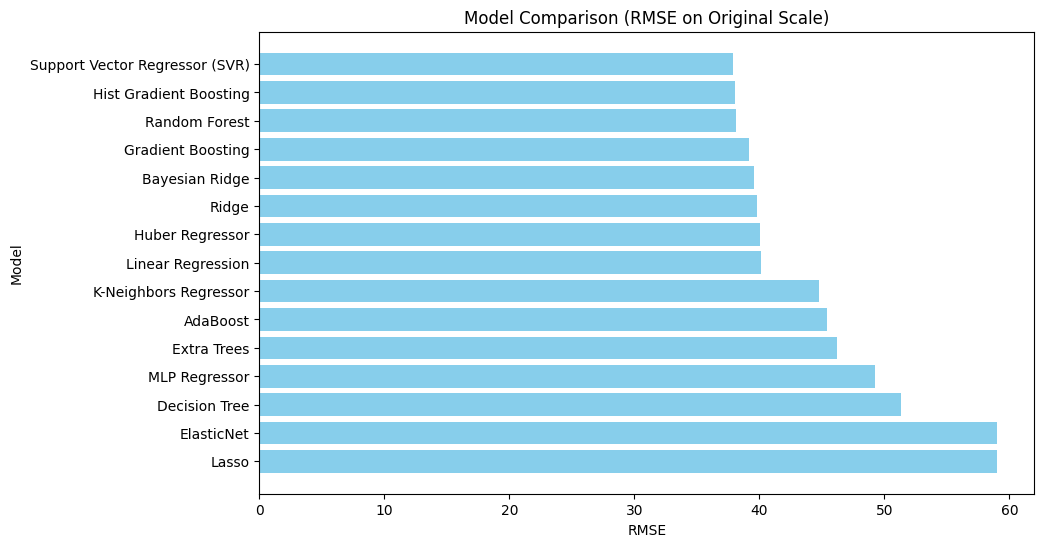

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, BayesianRidge
)
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Huber Regressor': HuberRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Support Vector Regressor (SVR)': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}

# Initialize results list
results = []

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train.ravel())  # Flatten target for training
    # Predict on validation data
    y_pred_scaled = model.predict(X_val)
    # Inverse transform predictions and true values to their original scale
    y_pred_original = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_val_original = y_scaler.inverse_transform(y_val.reshape(-1, 1))
    # Calculate RMSE in original scale
    rmse = np.sqrt(mean_squared_error(y_val_original, y_pred_original))
    # Append results
    results.append({'Model': model_name, 'RMSE': rmse})

# Create a DataFrame for results and sort by RMSE
results_df = pd.DataFrame(results).sort_values(by='RMSE')

# Display results
print(results_df)

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('Model Comparison (RMSE on Original Scale)')
plt.gca().invert_yaxis()
plt.show()


# Use one year check

In [292]:
import pandas as pd

# Load the data
train_features = pd.read_csv('train_features.csv')
train_labels = pd.read_csv('train_labels.csv')

# Merge on 'uid', keeping all rows from train_labels
data = pd.merge(train_features, train_labels, on='uid', how='right')

# Set 'uid' as index and sort for alignment
data.set_index('uid', inplace=True)
data.sort_index(inplace=True)
X = data.drop(columns=['composite_score'])


In [307]:

# List of columns to check
columns_to_check = [
    'age', 'urban', 'married', 'n_mar', 'edu_gru', 'n_living_child', 'migration', 'glob_hlth', 
    'adl_dress', 'adl_walk', 'adl_bath', 'adl_eat', 'adl_bed', 'adl_toilet', 'n_adl', 
    'iadl_money', 'iadl_meds', 'iadl_shop', 'iadl_meals', 'n_iadl', 'depressed', 'hard', 
    'restless', 'happy', 'lonely', 'enjoy', 'sad', 'tired', 'energetic', 'n_depr', 
    'cesd_depressed', 'hypertension', 'diabetes', 'resp_ill', 'arthritis', 'hrt_attack', 
    'stroke', 'cancer', 'n_illnesses', 'bmi', 'exer_3xwk', 'alcohol', 'tobacco', 'test_chol', 
    'test_tuber', 'test_diab', 'test_pres', 'hosp', 'visit_med', 'out_proc', 'visit_dental', 
    'imss', 'issste', 'pem_def_mar', 'insur_private', 'insur_other', 'insured', 
    'decis_famil', 'decis_personal', 'employment', 'sgender', 'rjob_hrswk', 'rjlocc_m', 
    'rjob_end', 'rjobend_reason', 'rearnings', 'searnings', 'hincome', 'hinc_business', 
    'hinc_rent', 'hinc_assets', 'hinc_cap', 'rinc_pension', 'sinc_pension', 'rrelgimp'
]
for col in columns_to_check:


    col_03 = f"{col}_03"
    col_12 = f"{col}_12"
    
    # Get unique values for each column
    unique_03 = X[col_03].unique()
    unique_12 = X[col_12].unique()
    
    # Filter out nan values for comparison
    unique_03_no_nan = [val for val in unique_03 if pd.notna(val)]
    unique_12_no_nan = [val for val in unique_12 if pd.notna(val)]
    
    # Sort the filtered arrays
    unique_03_sorted = sorted(unique_03_no_nan)
    unique_12_sorted = sorted(unique_12_no_nan)
    

    
    # Compare sorted arrays and check if they are equal
    are_equal = unique_03_sorted == unique_12_sorted
    #print(f'{are_equal}')
    if are_equal == False:
        print(col)
        print(f'{col_03} - {unique_03}')
        print(f'{col_12} - {unique_12}')

    


KeyError: 'age_03'

decis personal beda. 2003 angka saja, 2012 pakai penjelasan lengkap

decis_personal
decis_personal_03 - [nan  1.  2.  3.]
decis_personal_12 - ['1. A lot' '2. A little' nan '3. None']

In [294]:
decis_personal_mapping = {
    1: '1. A lot',
    2: '2. A little',
    3: '3. None'
}

# Process each column in the list
for col in columns_to_check:
    col_03 = f"{col}_03"
    col_12 = f"{col}_12"
    
    if col_03 in data.columns and col_12 in data.columns:
        # Create a new column without the year suffix
        new_col = col
        
        # Apply the logic for non-null values from 2012 or fallback to 2003 (mapped to strings)
        if col == 'decis_personal':
            data[new_col] = data.apply(
                lambda row: row[col_12] 
                if pd.notnull(row[col_12]) 
                else decis_personal_mapping.get(row[col_03], None) 
                if pd.notnull(row[col_03]) 
                else None, 
                axis=1
            )
        else:
            data[new_col] = data.apply(
            lambda row: row[col_12] if pd.notnull(row[col_12]) else row[col_03] if pd.notnull(row[col_03]) else None, 
            axis=1
        )

        
        # Drop the original columns
        data.drop([col_03, col_12], axis=1, inplace=True)

# Check the result
print("Data preview after processing:")
print(data.head())



Data preview after processing:
      vax_flu_12  vax_pneu_12  seg_pop_12  care_adult_12  care_child_12  \
uid                                                                       
aace         0.0          0.0         1.0            0.0            0.0   
aanz         1.0          0.0         0.0            0.0            1.0   
aape         0.0          0.0         0.0            0.0            1.0   
aape         0.0          0.0         0.0            0.0            1.0   
aard         1.0          1.0         0.0            0.0            0.0   

      volunteer_12  attends_class_12  attends_club_12  reads_12  games_12  \
uid                                                                         
aace           0.0               0.0              0.0       1.0       0.0   
aanz           0.0               0.0              1.0       1.0       1.0   
aape           0.0               0.0              0.0       1.0       0.0   
aape           0.0               0.0              0.0     

In [295]:
data.head()

,vax_flu_12,vax_pneu_12,seg_pop_12,care_adult_12,care_child_12,volunteer_12,attends_class_12,attends_club_12,reads_12,games_12,...,rearnings,searnings,hincome,hinc_business,hinc_rent,hinc_assets,hinc_cap,rinc_pension,sinc_pension,rrelgimp
uid,,,,,,,,,,,,,,,,,,,,,
aace,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,140000.0,10000.0,0.0,0.0,10000.0,0.0,0.0,2.somewhat important
aanz,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,70000.0,0.0,70000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.very important
aape,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.somewhat important
aape,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.somewhat important
aard,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.very important


In [275]:
data['decis_personal'].unique()

array(['1. A lot', '2. A little', '3. None', None], dtype=object)

In [276]:
kolom = data.columns
kolom

Index(['vax_flu_12', 'vax_pneu_12', 'seg_pop_12', 'care_adult_12',
       'care_child_12', 'volunteer_12', 'attends_class_12', 'attends_club_12',
       'reads_12', 'games_12',
       ...
       'rearnings', 'searnings', 'hincome', 'hinc_business', 'hinc_rent',
       'hinc_assets', 'hinc_cap', 'rinc_pension', 'sinc_pension', 'rrelgimp'],
      dtype='object', length=110)

In [277]:
for i, name in enumerate(data.isnull().sum()):
    print(kolom[i], name)

vax_flu_12 266
vax_pneu_12 355
seg_pop_12 107
care_adult_12 255
care_child_12 257
volunteer_12 260
attends_class_12 256
attends_club_12 255
reads_12 267
games_12 259
table_games_12 258
comms_tel_comp_12 257
act_mant_12 255
tv_12 255
sewing_12 255
satis_ideal_12 331
satis_excel_12 289
satis_fine_12 266
cosas_imp_12 272
wouldnt_change_12 297
memory_12 291
ragender 0
rameduc_m 535
rafeduc_m 640
rrfcntx_m_12 268
rsocact_m_12 255
rrelgwk_12 257
a16a_12 4309
a21_12 4288
a22_12 4295
a33b_12 4288
a34_12 1601
j11_12 89
year 0
composite_score 0
age 2
urban 0
married 0
n_mar 31
edu_gru 15
n_living_child 9
migration 0
glob_hlth 79
adl_dress 79
adl_walk 3
adl_bath 11
adl_eat 4
adl_bed 3
adl_toilet 3
n_adl 11
iadl_money 79
iadl_meds 79
iadl_shop 79
iadl_meals 79
n_iadl 79
depressed 83
hard 81
restless 82
happy 79
lonely 80
enjoy 82
sad 79
tired 79
energetic 82
n_depr 88
cesd_depressed 88
hypertension 7
diabetes 5
resp_ill 3
arthritis 7
hrt_attack 4
stroke 3
cancer 8
n_illnesses 21
bmi 314
exer_3xwk 

In [297]:
df = data.copy()
X = df.drop(columns=['composite_score'])  # Drop unique identifier
'''
Columns to drop because too many nan
a16a_12 4309
a21_12 4288
a22_12 4295
a33b_12 4288
a34_12 1601
decis_famil 1102 #maybe matter maybe not
sgender 1005
rjob_hrswk 1954 #maybe matter
rjlocc_m 1881 #maybe matter
rjob_end 3329
rjobend_reason 3295 #maybe matter but too much nan
searnings 1063
sinc_pension 1063
insur_private 1954
insur_other 1881
issste 1954
pem_def_mar 1881
hosp 1102
'''
# List of columns to drop because they have too many NaN values
# columns_to_drop = [
#     'a16a_12', 'a21_12', 'a22_12', 'a33b_12', 'a34_12', 
#     #'decis_famil', 
#     'sgender', 
#     'rjob_hrswk', 'rjlocc_m', 
#     'rjob_end', 
#     'rjobend_reason', 
#     'searnings', 'sinc_pension',
#     'insur_private',
#     'insur_other',
#     'issste',
#     'pem_def_mar',
#     'insured',
#     'employment',
#     'rearnings',
#     'rinc_pension'

# ]
# # Drop the specified columns from X
# #X.drop(columns=columns_to_drop, inplace=True)


# List of columns that have been deleted due to more than 1000 missing values
columns_with_nan = X.columns[X.isnull().sum() > 3000].tolist()

X.dropna(thresh=X.shape[0] - 3000, axis=1, inplace=True)


# Output the list of deleted columns
print("Deleted columns (with more than 1000 missing values):")
print(columns_with_nan)

y = df['composite_score']  # Replace 'target' with the actual label column name
for i, total_null in enumerate(X.isnull().sum()):
    if total_null >= 1000:
        print(kolom[i], total_null)
    


Deleted columns (with more than 1000 missing values):
['a16a_12', 'a21_12', 'a22_12', 'a33b_12', 'rjob_end', 'rjobend_reason']
a16a_12 1601
issste 1102
insur_other 1005
insured 1954
decis_famil 1881
employment 1063
searnings 1063


In [298]:
for i, total_null in enumerate(X.isnull().sum()):

    print(kolom[i], total_null)

vax_flu_12 266
vax_pneu_12 355
seg_pop_12 107
care_adult_12 255
care_child_12 257
volunteer_12 260
attends_class_12 256
attends_club_12 255
reads_12 267
games_12 259
table_games_12 258
comms_tel_comp_12 257
act_mant_12 255
tv_12 255
sewing_12 255
satis_ideal_12 331
satis_excel_12 289
satis_fine_12 266
cosas_imp_12 272
wouldnt_change_12 297
memory_12 291
ragender 0
rameduc_m 535
rafeduc_m 640
rrfcntx_m_12 268
rsocact_m_12 255
rrelgwk_12 257
a16a_12 1601
a21_12 89
a22_12 0
a33b_12 2
a34_12 0
j11_12 0
year 31
composite_score 15
age 9
urban 0
married 79
n_mar 79
edu_gru 3
n_living_child 11
migration 4
glob_hlth 3
adl_dress 3
adl_walk 11
adl_bath 79
adl_eat 79
adl_bed 79
adl_toilet 79
n_adl 79
iadl_money 83
iadl_meds 81
iadl_shop 82
iadl_meals 79
n_iadl 80
depressed 82
hard 79
restless 79
happy 82
lonely 88
enjoy 88
sad 7
tired 5
energetic 3
n_depr 7
cesd_depressed 4
hypertension 3
diabetes 8
resp_ill 21
arthritis 314
hrt_attack 79
stroke 0
cancer 0
n_illnesses 81
bmi 88
exer_3xwk 80
alcoho

In [299]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Make sure X is a DataFrame
#X = pd.DataFrame(X)  # If X is not already a DataFrame, ensure it's one

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert columns with mixed types to the correct types
for col in categorical_features:
    X[col] = X[col].apply(
    lambda x: str(x) if pd.notna(x) else x  # Convert non-NaN values to string, leave NaN as is
)


# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])
for col in numerical_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert numerical columns to float, invalid parsing will become NaN

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing numerical values with the median
    ('scaler', MinMaxScaler())  # Scale numerical features between 0 and 1
])



# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocessing for y (target)
y_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply preprocessing to X
X_transformed = preprocessor.fit_transform(X)

# Apply MinMaxScaler to y
y_reshaped = y.values.reshape(-1, 1)  # Reshape y to a 2D array for scaler
y_transformed = y_scaler.fit_transform(y_reshaped)

# Outputs
print("Transformed X (features):", X_transformed)
print("Transformed y (target):", y_transformed)


Transformed X (features): [[0. 0. 1. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]]
Transformed y (target): [[0.51818182]
 [0.61212121]
 [0.47575758]
 ...
 [0.35454545]
 [0.08484848]
 [0.43333333]]


In [236]:
print(len(categorical_features) + len(numerical_features))

96


In [240]:
X_transformed

array([[0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.]])

In [235]:
len(X_transformed[0])

174

e:\project\MLComp\.venv\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


                             Model       RMSE
12          Hist Gradient Boosting  37.496284
8                    Random Forest  37.556560
6   Support Vector Regressor (SVR)  37.937864
9                Gradient Boosting  38.873740
5                   Bayesian Ridge  39.358636
1                            Ridge  39.664260
4                  Huber Regressor  39.961572
0                Linear Regression  40.093015
11                        AdaBoost  44.242859
13           K-Neighbors Regressor  45.347719
14                   MLP Regressor  45.488534
10                     Extra Trees  45.937054
7                    Decision Tree  50.676074
3                       ElasticNet  59.036278
2                            Lasso  59.036278


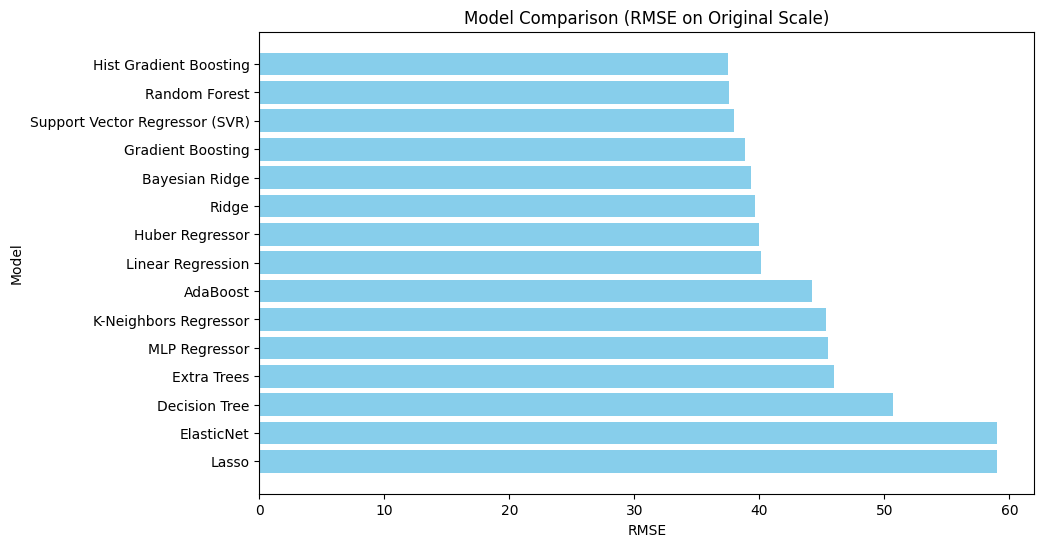

In [300]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, BayesianRidge
)
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Huber Regressor': HuberRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Support Vector Regressor (SVR)': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}

# Initialize results list
results = []

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train.ravel())  # Flatten target for training
    # Predict on validation data
    y_pred_scaled = model.predict(X_val)
    # Inverse transform predictions and true values to their original scale
    y_pred_original = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_val_original = y_scaler.inverse_transform(y_val.reshape(-1, 1))
    # Calculate RMSE in original scale
    rmse = np.sqrt(mean_squared_error(y_val_original, y_pred_original))
    # Append results
    results.append({'Model': model_name, 'RMSE': rmse})

# Create a DataFrame for results and sort by RMSE
results_df = pd.DataFrame(results).sort_values(by='RMSE')

# Display results
print(results_df)

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('Model Comparison (RMSE on Original Scale)')
plt.gca().invert_yaxis()
plt.show()


In [287]:
#traditional machine learning
# Load test features and submission format
test_features = pd.read_csv('test_features.csv')
submission_format = pd.read_csv('submission_format.csv')
print(len(test_features), len(submission_format))

# Merge on 'uid', keeping all rows from train_labels
pred_data = pd.merge(test_features, submission_format, on='uid', how='right')
print(len(pred_data))
decis_personal_mapping = {
    1: '1. A lot',
    2: '2. A little',
    3: '3. None'
}
columns_to_check = [
    'age', 'urban', 'married', 'n_mar', 'edu_gru', 'n_living_child', 'migration', 'glob_hlth', 
    'adl_dress', 'adl_walk', 'adl_bath', 'adl_eat', 'adl_bed', 'adl_toilet', 'n_adl', 
    'iadl_money', 'iadl_meds', 'iadl_shop', 'iadl_meals', 'n_iadl', 'depressed', 'hard', 
    'restless', 'happy', 'lonely', 'enjoy', 'sad', 'tired', 'energetic', 'n_depr', 
    'cesd_depressed', 'hypertension', 'diabetes', 'resp_ill', 'arthritis', 'hrt_attack', 
    'stroke', 'cancer', 'n_illnesses', 'bmi', 'exer_3xwk', 'alcohol', 'tobacco', 'test_chol', 
    'test_tuber', 'test_diab', 'test_pres', 'hosp', 'visit_med', 'out_proc', 'visit_dental', 
    'imss', 'issste', 'pem_def_mar', 'insur_private', 'insur_other', 'insured', 
    'decis_famil', 'decis_personal', 'employment', 'sgender', 'rjob_hrswk', 'rjlocc_m', 
    'rjob_end', 'rjobend_reason', 'rearnings', 'searnings', 'hincome', 'hinc_business', 
    'hinc_rent', 'hinc_assets', 'hinc_cap', 'rinc_pension', 'sinc_pension', 'rrelgimp'
]
# Process each column in the list
for col in columns_to_check:
    col_03 = f"{col}_03"
    col_12 = f"{col}_12"
    
    if col_03 in pred_data.columns and col_12 in pred_data.columns:
        # Create a new column without the year suffix
        new_col = col
        
        # Apply the logic for non-null values from 2012 or fallback to 2003 (mapped to strings)
        if col == 'decis_personal':
            pred_data[new_col] = pred_data.apply(
                lambda row: row[col_12] 
                if pd.notnull(row[col_12]) 
                else decis_personal_mapping.get(row[col_03], None) 
                if pd.notnull(row[col_03]) 
                else None, 
                axis=1
            )
        else:
            pred_data[new_col] = pred_data.apply(
            lambda row: row[col_12] if pd.notnull(row[col_12]) else row[col_03] if pd.notnull(row[col_03]) else None, 
            axis=1
        )

        
        # Drop the original columns
        pred_data.drop([col_03, col_12], axis=1, inplace=True)

# Check the result
print("pred_data preview after processing:")
print(pred_data.head())

col_to_delete = ['a16a_12', 'a21_12', 'a22_12', 'a33b_12', 'a34_12', 'decis_famil', 'sgender', 'rjob_hrswk', 'rjlocc_m', 'rjob_end', 'rjobend_reason', 'searnings', 'sinc_pension']
pred_data.drop(columns=col_to_delete, inplace=True)
# Preprocess the test features using the same preprocessor
test_features_transformed = preprocessor.transform(pred_data)

# Use the best model (Hist Gradient Boosting) to predict the composite score
best_model = models['Support Vector Regressor (SVR)']
predictions_scaled = best_model.predict(test_features_transformed)

# Inverse transform predictions to the original scale
predictions_original = np.rint(y_scaler.inverse_transform(predictions_scaled.reshape(-1, 1))).astype('int64')
print(predictions_original)
# Prepare the submission pred_dataframe
submission_format['composite_score'] = predictions_original.flatten()

# Save the submission pred_dataframe to a CSV file
submission_format.to_csv('submission_5.csv', index=False)

print("Submission file 'submission_5.csv' created successfully!")


819 1105
1105
pred_data preview after processing:
    uid  vax_flu_12  vax_pneu_12  seg_pop_12  care_adult_12  care_child_12  \
0  abxu         NaN          NaN         0.0            NaN            NaN   
1  aeol         0.0          0.0         0.0            0.0            0.0   
2  aeol         0.0          0.0         0.0            0.0            0.0   
3  afnb         0.0          0.0         0.0            1.0            0.0   
4  afnb         0.0          0.0         0.0            1.0            0.0   

   volunteer_12  attends_class_12  attends_club_12  reads_12  ...  rearnings  \
0           NaN               NaN              NaN       NaN  ...        0.0   
1           0.0               0.0              0.0       0.0  ...        0.0   
2           0.0               0.0              0.0       0.0  ...        0.0   
3           0.0               0.0              0.0       1.0  ...        0.0   
4           0.0               0.0              0.0       1.0  ...        0.0   



deep learning

In [301]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Define the advanced PyTorch model
class AdvancedRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(AdvancedRegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.1),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# Preprocess data
X_transformed = torch.tensor(X_transformed, dtype=torch.float32)
y_transformed = torch.tensor(y_transformed, dtype=torch.float32)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_transformed, y_transformed, test_size=0.2, random_state=42
)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = AdvancedRegressionModel(input_size)

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# Training the model
epochs = 100
best_val_loss = float('inf')
early_stop_counter = 0
patience = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y.squeeze())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y.squeeze())
            val_loss += loss.item()

    # Adjust learning rate
    scheduler.step(val_loss / len(val_loader))

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
    else:
        early_stop_counter += 1

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")

    if early_stop_counter >= patience:
        print("Early stopping triggered.")
        break



# Load the best model for evaluation
model.load_state_dict(torch.load("best_model.pth",  weights_only=True))

# Evaluate the model on validation set
model.eval()
y_val_pred_scaled = []
y_val_true = []

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        outputs = model(batch_X).squeeze()
        y_val_pred_scaled.extend(outputs.numpy())
        y_val_true.extend(batch_y.numpy())

# Inverse transform predictions and true values
y_val_pred_original = y_scaler.inverse_transform(np.array(y_val_pred_scaled).reshape(-1, 1))
y_val_original = y_scaler.inverse_transform(np.array(y_val_true).reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val_original, y_val_pred_original))
print(f"Validation RMSE: {rmse:.4f}")

e:\project\MLComp\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100, Training Loss: 0.1160, Validation Loss: 0.0338
Epoch 2/100, Training Loss: 0.0366, Validation Loss: 0.0216
Epoch 3/100, Training Loss: 0.0257, Validation Loss: 0.0182
Epoch 4/100, Training Loss: 0.0216, Validation Loss: 0.0170
Epoch 5/100, Training Loss: 0.0198, Validation Loss: 0.0159
Epoch 6/100, Training Loss: 0.0184, Validation Loss: 0.0158
Epoch 7/100, Training Loss: 0.0175, Validation Loss: 0.0158
Epoch 8/100, Training Loss: 0.0164, Validation Loss: 0.0150
Epoch 9/100, Training Loss: 0.0156, Validation Loss: 0.0147
Epoch 10/100, Training Loss: 0.0157, Validation Loss: 0.0147
Epoch 11/100, Training Loss: 0.0151, Validation Loss: 0.0142
Epoch 12/100, Training Loss: 0.0144, Validation Loss: 0.0143
Epoch 13/100, Training Loss: 0.0144, Validation Loss: 0.0140
Epoch 14/100, Training Loss: 0.0143, Validation Loss: 0.0143
Epoch 15/100, Training Loss: 0.0136, Validation Loss: 0.0142
Epoch 16/100, Training Loss: 0.0136, Validation Loss: 0.0141
Epoch 17/100, Training Loss: 0.01

In [302]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val_original, y_val_pred_original))
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 37.5852


In [303]:
#traditional machine learning
# Load test features and submission format
test_features = pd.read_csv('test_features.csv')
submission_format = pd.read_csv('submission_format.csv')
print(len(test_features), len(submission_format))

# Merge on 'uid', keeping all rows from train_labels
pred_data = pd.merge(test_features, submission_format, on='uid', how='right')
print(len(pred_data))
decis_personal_mapping = {
    1: '1. A lot',
    2: '2. A little',
    3: '3. None'
}
columns_to_check = [
    'age', 'urban', 'married', 'n_mar', 'edu_gru', 'n_living_child', 'migration', 'glob_hlth', 
    'adl_dress', 'adl_walk', 'adl_bath', 'adl_eat', 'adl_bed', 'adl_toilet', 'n_adl', 
    'iadl_money', 'iadl_meds', 'iadl_shop', 'iadl_meals', 'n_iadl', 'depressed', 'hard', 
    'restless', 'happy', 'lonely', 'enjoy', 'sad', 'tired', 'energetic', 'n_depr', 
    'cesd_depressed', 'hypertension', 'diabetes', 'resp_ill', 'arthritis', 'hrt_attack', 
    'stroke', 'cancer', 'n_illnesses', 'bmi', 'exer_3xwk', 'alcohol', 'tobacco', 'test_chol', 
    'test_tuber', 'test_diab', 'test_pres', 'hosp', 'visit_med', 'out_proc', 'visit_dental', 
    'imss', 'issste', 'pem_def_mar', 'insur_private', 'insur_other', 'insured', 
    'decis_famil', 'decis_personal', 'employment', 'sgender', 'rjob_hrswk', 'rjlocc_m', 
    'rjob_end', 'rjobend_reason', 'rearnings', 'searnings', 'hincome', 'hinc_business', 
    'hinc_rent', 'hinc_assets', 'hinc_cap', 'rinc_pension', 'sinc_pension', 'rrelgimp'
]
# Process each column in the list
for col in columns_to_check:
    col_03 = f"{col}_03"
    col_12 = f"{col}_12"
    
    if col_03 in pred_data.columns and col_12 in pred_data.columns:
        # Create a new column without the year suffix
        new_col = col
        
        # Apply the logic for non-null values from 2012 or fallback to 2003 (mapped to strings)
        if col == 'decis_personal':
            pred_data[new_col] = pred_data.apply(
                lambda row: row[col_12] 
                if pd.notnull(row[col_12]) 
                else decis_personal_mapping.get(row[col_03], None) 
                if pd.notnull(row[col_03]) 
                else None, 
                axis=1
            )
        else:
            pred_data[new_col] = pred_data.apply(
            lambda row: row[col_12] if pd.notnull(row[col_12]) else row[col_03] if pd.notnull(row[col_03]) else None, 
            axis=1
        )

        
        # Drop the original columns
        pred_data.drop([col_03, col_12], axis=1, inplace=True)

# Check the result
print("pred_data preview after processing:")
print(pred_data.head())

col_to_delete = ['a16a_12', 'a21_12', 'a22_12', 'a33b_12', 'rjob_end', 'rjobend_reason']
pred_data.drop(columns=col_to_delete, inplace=True)

819 1105
1105
pred_data preview after processing:
    uid  vax_flu_12  vax_pneu_12  seg_pop_12  care_adult_12  care_child_12  \
0  abxu         NaN          NaN         0.0            NaN            NaN   
1  aeol         0.0          0.0         0.0            0.0            0.0   
2  aeol         0.0          0.0         0.0            0.0            0.0   
3  afnb         0.0          0.0         0.0            1.0            0.0   
4  afnb         0.0          0.0         0.0            1.0            0.0   

   volunteer_12  attends_class_12  attends_club_12  reads_12  ...  rearnings  \
0           NaN               NaN              NaN       NaN  ...        0.0   
1           0.0               0.0              0.0       0.0  ...        0.0   
2           0.0               0.0              0.0       0.0  ...        0.0   
3           0.0               0.0              0.0       1.0  ...        0.0   
4           0.0               0.0              0.0       1.0  ...        0.0   



In [306]:
#deep learning
# Submission
# Preprocess test features
input_size = X_train.shape[1]
model = AdvancedRegressionModel(input_size)
model.load_state_dict(torch.load("best_model.pth"))
test_features_transformed = preprocessor.transform(pred_data)
test_features_tensor = torch.tensor(test_features_transformed, dtype=torch.float32)

# Predict on test data
model.eval()
test_predictions_scaled = model(test_features_tensor).detach().numpy()
test_predictions_original = np.rint(y_scaler.inverse_transform(test_predictions_scaled)).astype('int64')

# Prepare the submission dataframe
submission_format['composite_score'] = test_predictions_original.flatten()
submission_format.to_csv('submission_6.csv', index=False)
print("Submission file 'submission_6.csv' created successfully!")


Submission file 'submission_6.csv' created successfully!


C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_13104\1730331639.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


39.56 RMSE

possible future improvement
use common sense



Try use correlation 

Selected Features and Correlations:
                                           Feature  Correlation
142                      cat__edu_gru_4. 10+ years     0.394360
8                                    num__reads_12     0.330995
127                              cat__age_1. 50–59     0.326291
125  cat__j11_12_Wood, mosaic, or other covering 1     0.316524
141                      cat__edu_gru_3. 7–9 years     0.298850
9                                    num__games_12     0.292463
133                         cat__urban_1. 100,000+     0.265877
102             cat__rafeduc_m_4.More than primary     0.228486
103           cat__rrfcntx_m_12_1.Almost every day     0.223560
11                          num__comms_tel_comp_12     0.222651
145                  cat__n_living_child_1. 1 or 2     0.222349
10                             num__table_games_12     0.218697
2                                  num__seg_pop_12    -0.210106
111                      cat__rrfcntx_m_12_9.Never    -0.228129
120 

C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_13104\4203133752.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x="Correlation", y="Feature", palette="viridis")


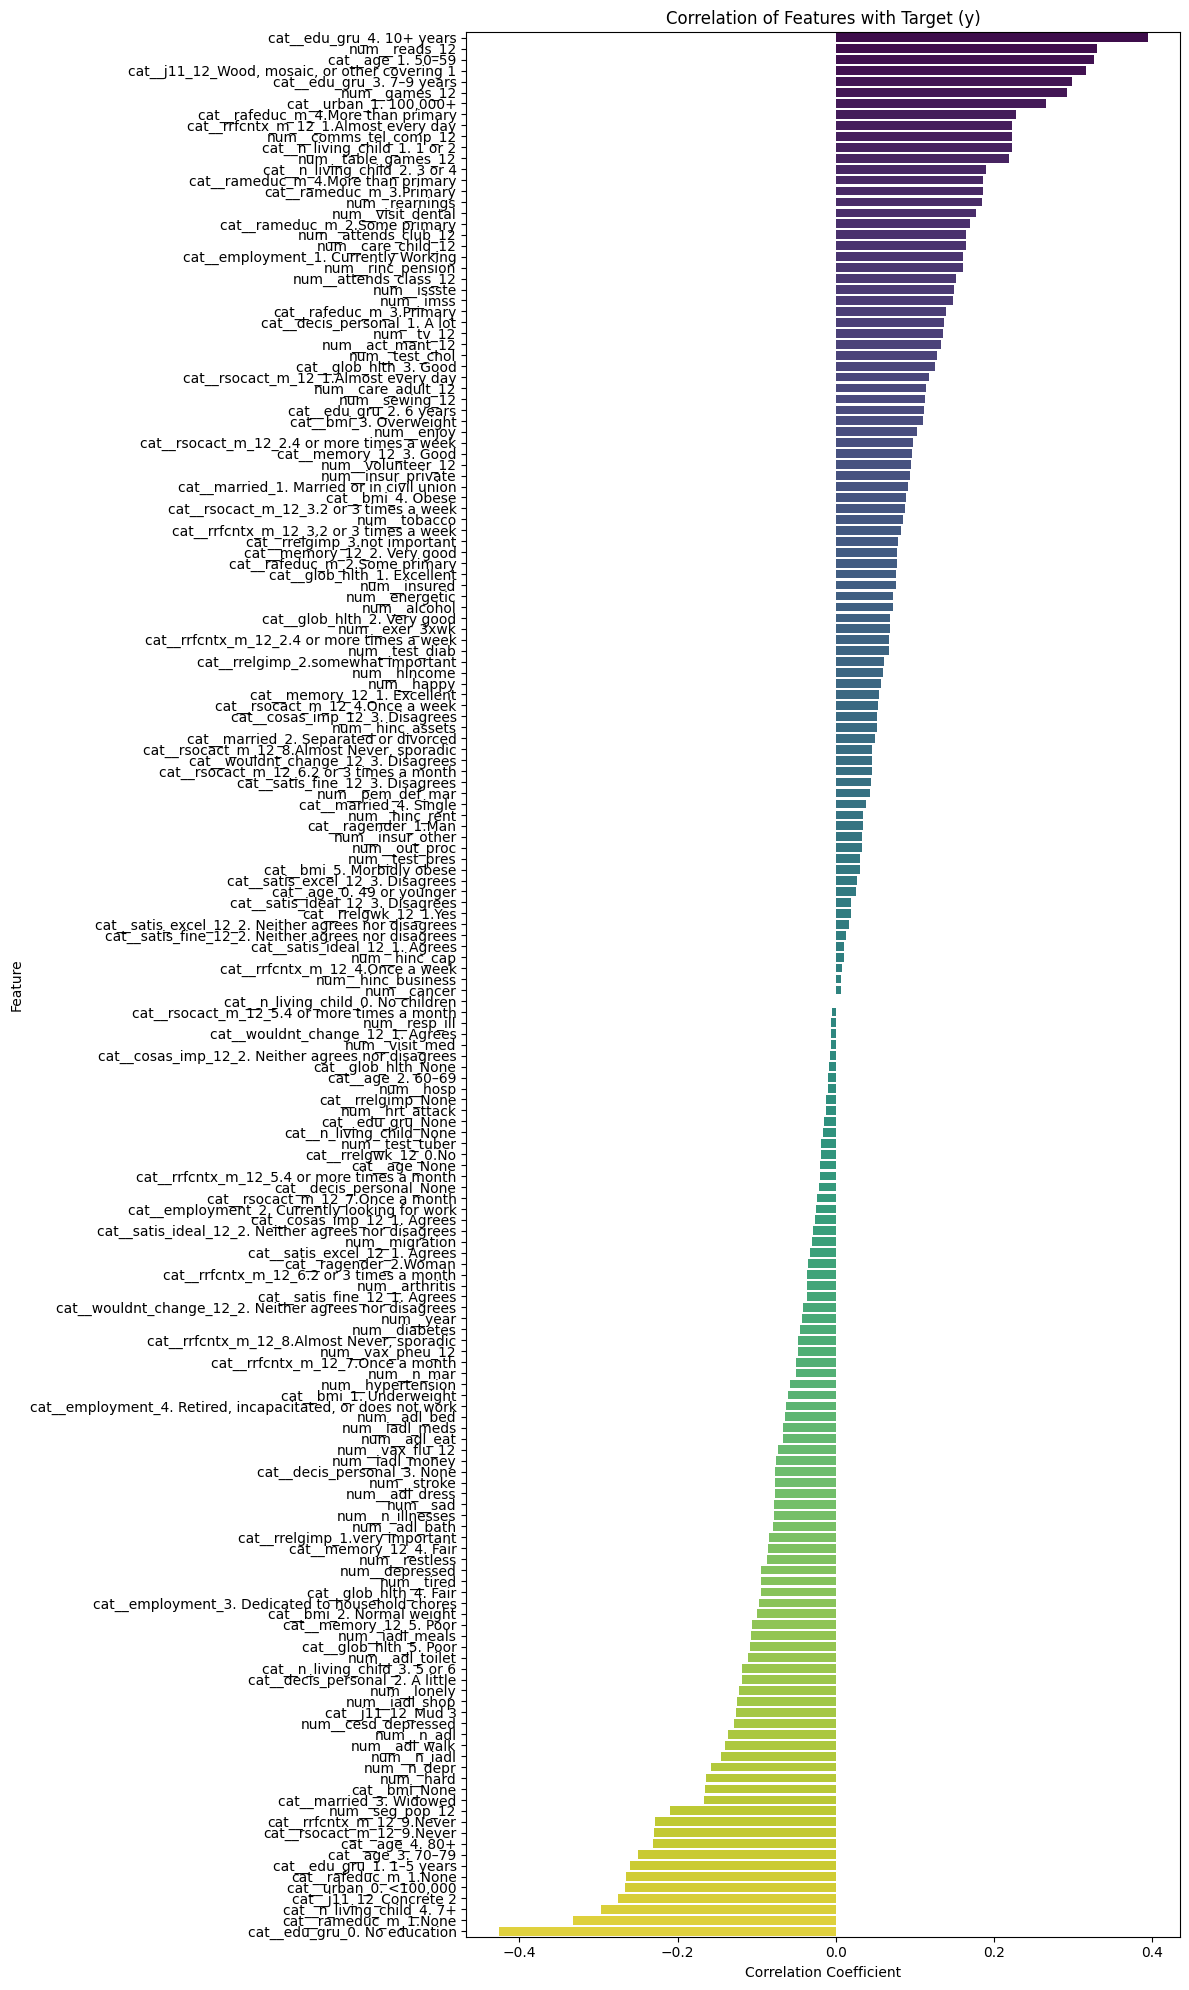

Transformed and Selected X (features):       cat__edu_gru_4. 10+ years  num__reads_12  cat__age_1. 50–59  \
0                           0.0            1.0                0.0   
1                           0.0            1.0                1.0   
2                           0.0            1.0                1.0   
3                           0.0            1.0                1.0   
4                           0.0            1.0                0.0   
...                         ...            ...                ...   
4338                        0.0            1.0                1.0   
4339                        0.0            0.0                0.0   
4340                        0.0            0.0                0.0   
4341                        0.0            1.0                0.0   
4342                        0.0            0.0                0.0   

      cat__j11_12_Wood, mosaic, or other covering 1  \
0                                               0.0   
1                     

In [265]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Convert columns with mixed types to the correct types
for col in categorical_features:
    X[col] = X[col].apply(
        lambda x: str(x) if pd.notna(x) else x  # Convert non-NaN values to string, leave NaN as is
    )

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing categorical values with the most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

for col in numerical_features:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Convert numerical columns to float, invalid parsing will become NaN

# Preprocessing for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing numerical values with the median
    ('scaler', MinMaxScaler())  # Scale numerical features between 0 and 1
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Preprocessing for y (target)
y_scaler = MinMaxScaler(feature_range=(0, 1))

# Apply preprocessing to X
X_transformed = preprocessor.fit_transform(X)
X_transformed_df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

# Apply MinMaxScaler to y
y_reshaped = y.values.reshape(-1, 1)  # Reshape y to a 2D array for scaler
y_transformed = y_scaler.fit_transform(y_reshaped)

# Calculate correlation between features and target
y_transformed_flat = y_transformed.ravel()
correlations = {}
for col in X_transformed_df.columns:
    correlations[col] = np.corrcoef(X_transformed_df[col], y_transformed_flat)[0, 1]

# Convert to DataFrame for feature selection
correlation_df = pd.DataFrame(list(correlations.items()), columns=["Feature", "Correlation"])
correlation_df.sort_values(by="Correlation", ascending=False, inplace=True)

# Select features with correlation above a threshold
correlation_threshold = 0.2  # You can adjust this threshold
selected_features = correlation_df[correlation_df["Correlation"].abs() > correlation_threshold]["Feature"].tolist()

# Filter X_transformed for selected features
X_transformed_selected = X_transformed_df[selected_features]

# Print selected features and their correlations
print("Selected Features and Correlations:")
print(correlation_df[correlation_df["Correlation"].abs() > correlation_threshold])

# Plot correlations
plt.figure(figsize=(12, 20))
sns.barplot(data=correlation_df, x="Correlation", y="Feature", palette="viridis")
plt.title("Correlation of Features with Target (y)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Outputs
print("Transformed and Selected X (features):", X_transformed_selected)
print("Transformed y (target):", y_transformed)


                             Model       RMSE
6   Support Vector Regressor (SVR)  40.495251
12          Hist Gradient Boosting  40.555898
9                Gradient Boosting  40.574412
5                   Bayesian Ridge  40.593651
1                            Ridge  40.620966
0                Linear Regression  40.633260
4                  Huber Regressor  40.693442
8                    Random Forest  41.187999
14                   MLP Regressor  42.063316
13           K-Neighbors Regressor  43.254128
11                        AdaBoost  44.704428
10                     Extra Trees  48.018168
7                    Decision Tree  48.191557
3                       ElasticNet  59.036278
2                            Lasso  59.036278


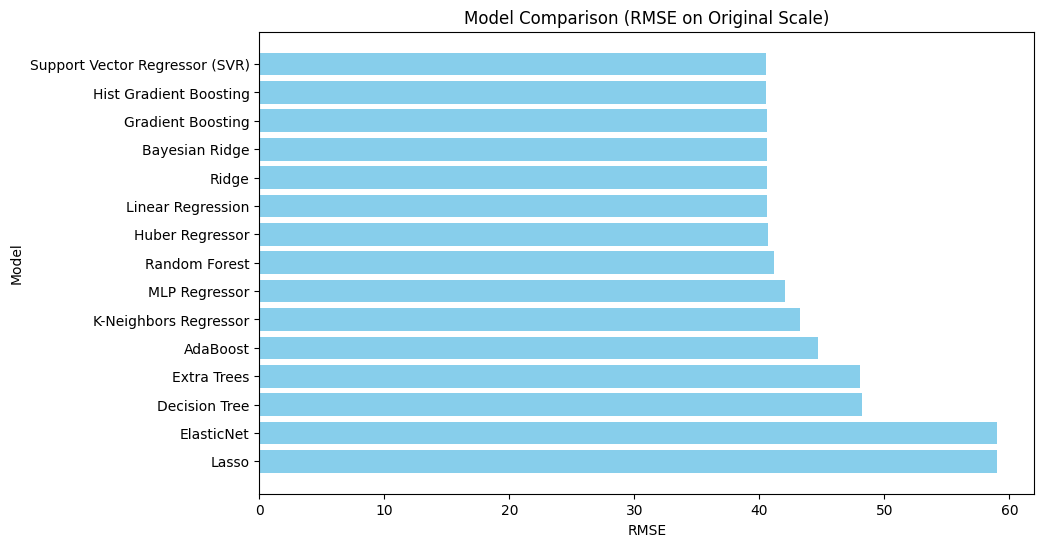

In [266]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, BayesianRidge
)
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, HistGradientBoostingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'Huber Regressor': HuberRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Support Vector Regressor (SVR)': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Hist Gradient Boosting': HistGradientBoostingRegressor(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'MLP Regressor': MLPRegressor(max_iter=1000)
}

# Initialize results list
results = []

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_transformed_selected, y_transformed, test_size=0.2, random_state=42)

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train.ravel())  # Flatten target for training
    # Predict on validation data
    y_pred_scaled = model.predict(X_val)
    # Inverse transform predictions and true values to their original scale
    y_pred_original = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_val_original = y_scaler.inverse_transform(y_val.reshape(-1, 1))
    # Calculate RMSE in original scale
    rmse = np.sqrt(mean_squared_error(y_val_original, y_pred_original))
    # Append results
    results.append({'Model': model_name, 'RMSE': rmse})

# Create a DataFrame for results and sort by RMSE
results_df = pd.DataFrame(results).sort_values(by='RMSE')

# Display results
print(results_df)

# Plot RMSE comparison
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.title('Model Comparison (RMSE on Original Scale)')
plt.gca().invert_yaxis()
plt.show()


In [264]:
# Extract feature names from the preprocessor
feature_names = []
if hasattr(preprocessor, 'transformers_'):
    for name, transformer, columns in preprocessor.transformers_:
        if hasattr(transformer, 'named_steps'):
            if 'onehot' in transformer.named_steps:
                # Get feature names for one-hot encoded columns
                encoder = transformer.named_steps['onehot']
                encoded_columns = encoder.get_feature_names_out(columns)
                feature_names.extend(encoded_columns)
            else:
                feature_names.extend(columns)
        else:
            feature_names.extend(columns)

# Extract coefficients for Linear Regression
linear_regression = models['Linear Regression']
coefficients = linear_regression.coef_

# Ensure coefficients are flattened if multi-dimensional
if coefficients.ndim > 1:
    coefficients = coefficients.ravel()

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Weight': coefficients
})

# Sort by absolute weight values (descending)
feature_importance_df['Abs_Weight'] = feature_importance_df['Weight'].abs()
sorted_features = feature_importance_df.sort_values(by='Abs_Weight', ascending=False)

# Display the top features
print("Sorted Features by Absolute Weight:")
print(sorted_features[['Feature', 'Weight']])

# Optional: Visualize the top features
top_n = 20  # Change this to display more or fewer features
plt.figure(figsize=(10, 6))
plt.barh(sorted_features['Feature'][:top_n], sorted_features['Weight'][:top_n], color='skyblue')
plt.xlabel('Weight')
plt.ylabel('Feature')
plt.title('Top Features by Weight')
plt.gca().invert_yaxis()
plt.show()


ValueError: All arrays must be of the same length

Correlation Scores:
                                           Feature  Correlation
142                      cat__edu_gru_4. 10+ years     0.394360
8                                    num__reads_12     0.330995
127                              cat__age_1. 50–59     0.326291
125  cat__j11_12_Wood, mosaic, or other covering 1     0.316524
141                      cat__edu_gru_3. 7–9 years     0.298850
..                                             ...          ...
132                         cat__urban_0. <100,000    -0.265877
123                         cat__j11_12_Concrete 2    -0.275841
148                      cat__n_living_child_4. 7+    -0.297439
95                           cat__rameduc_m_1.None    -0.332525
138                   cat__edu_gru_0. No education    -0.426159

[174 rows x 2 columns]


C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_13104\3329144088.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x="Correlation", y="Feature", palette="viridis")


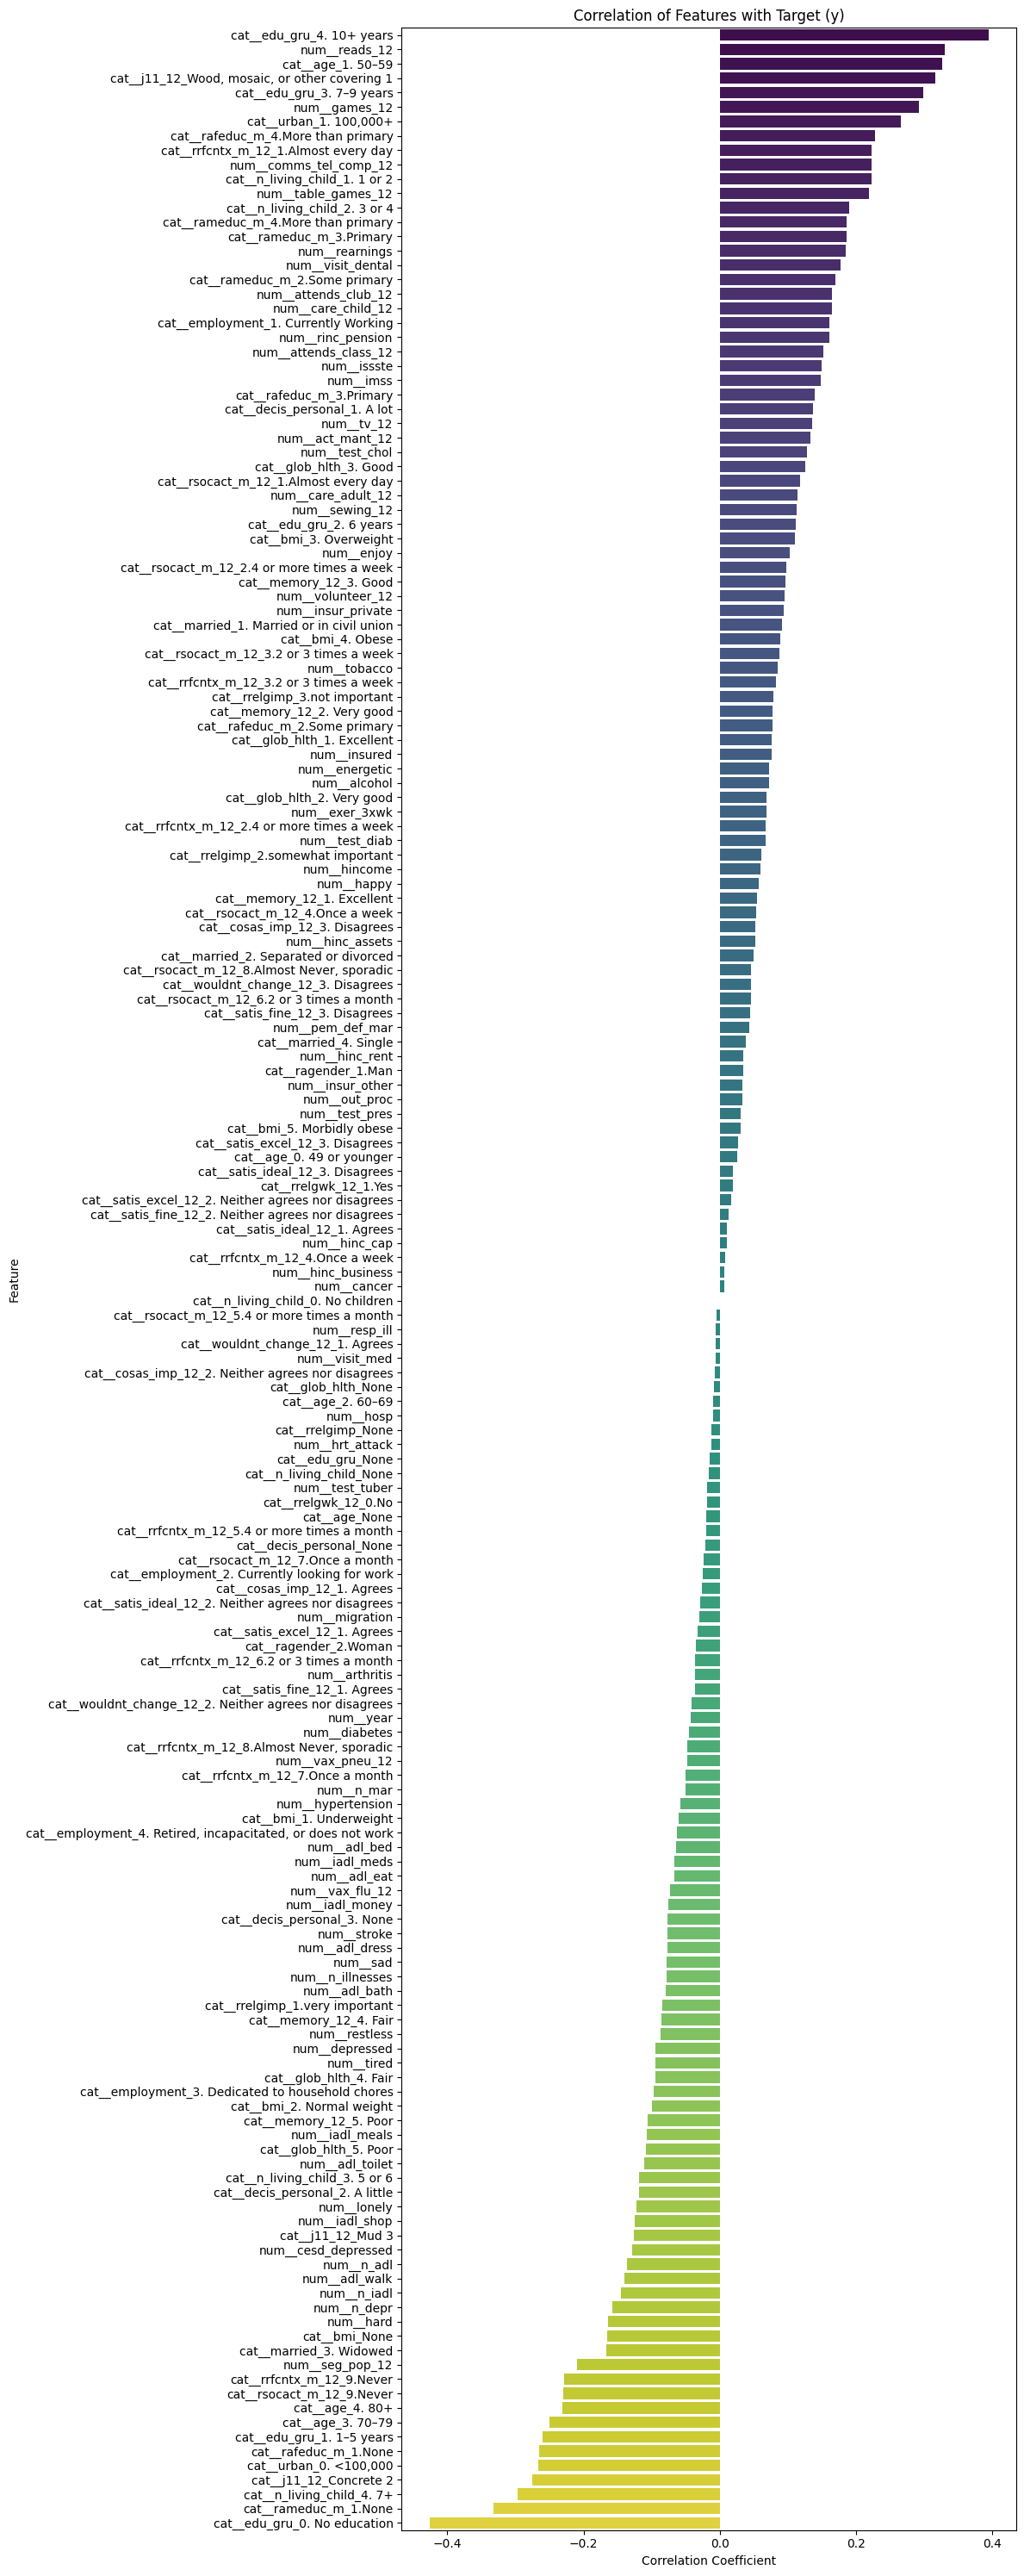

In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert processed X back to DataFrame
# Assuming the one-hot encoder expanded categorical features
X_transformed_df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

# Convert y_transformed back to 1D for correlation
y_transformed_flat = y_transformed.ravel()

# Compute correlation
correlations = {}
for col in X_transformed_df.columns:
    correlations[col] = np.corrcoef(X_transformed_df[col], y_transformed_flat)[0, 1]

# Convert to DataFrame for easier plotting
correlation_df = pd.DataFrame(list(correlations.items()), columns=["Feature", "Correlation"])
correlation_df.sort_values(by="Correlation", ascending=False, inplace=True)

# Print correlation scores
print("Correlation Scores:")
print(correlation_df)

# Plot correlation scores
plt.figure(figsize=(12, 30))
sns.barplot(data=correlation_df, x="Correlation", y="Feature", palette="viridis")
plt.title("Correlation of Features with Target (y)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [251]:
X_df

,0,1,2,3,4,5,6,7,8,9,...,164,165,166,167,168,169,170,171,172,173
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4339,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4340,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4341,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [267]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Define the advanced PyTorch model
class AdvancedRegressionModel(nn.Module):
    def __init__(self, input_size):
        super(AdvancedRegressionModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.4),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.1),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.BatchNorm1d(32),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# Preprocess data
X_transformed = torch.tensor(X_transformed, dtype=torch.float32)
y_transformed = torch.tensor(y_transformed, dtype=torch.float32)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_transformed, y_transformed, test_size=0.2, random_state=42
)

# Create DataLoaders
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = AdvancedRegressionModel(input_size)

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

# Training the model
epochs = 100
best_val_loss = float('inf')
early_stop_counter = 0
patience = 10

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y.squeeze())
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch_X, batch_y in val_loader:
            outputs = model(batch_X).squeeze()
            loss = criterion(outputs, batch_y.squeeze())
            val_loss += loss.item()

    # Adjust learning rate
    scheduler.step(val_loss / len(val_loader))

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "best_model.pth")  # Save the best model
    else:
        early_stop_counter += 1

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")

    if early_stop_counter >= patience:
        print("Early stopping triggered.")
        break




e:\project\MLComp\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100, Training Loss: 0.2223, Validation Loss: 0.0723
Epoch 2/100, Training Loss: 0.0563, Validation Loss: 0.0260
Epoch 3/100, Training Loss: 0.0316, Validation Loss: 0.0211
Epoch 4/100, Training Loss: 0.0257, Validation Loss: 0.0178
Epoch 5/100, Training Loss: 0.0224, Validation Loss: 0.0163
Epoch 6/100, Training Loss: 0.0201, Validation Loss: 0.0167
Epoch 7/100, Training Loss: 0.0190, Validation Loss: 0.0164
Epoch 8/100, Training Loss: 0.0183, Validation Loss: 0.0160
Epoch 9/100, Training Loss: 0.0176, Validation Loss: 0.0155
Epoch 10/100, Training Loss: 0.0170, Validation Loss: 0.0164
Epoch 11/100, Training Loss: 0.0169, Validation Loss: 0.0146
Epoch 12/100, Training Loss: 0.0165, Validation Loss: 0.0143
Epoch 13/100, Training Loss: 0.0156, Validation Loss: 0.0150
Epoch 14/100, Training Loss: 0.0157, Validation Loss: 0.0144
Epoch 15/100, Training Loss: 0.0154, Validation Loss: 0.0148
Epoch 16/100, Training Loss: 0.0143, Validation Loss: 0.0142
Epoch 17/100, Training Loss: 0.01

In [268]:

# Load the best model for evaluation
model.load_state_dict(torch.load("best_model.pth",  weights_only=True))

# Evaluate the model on validation set
model.eval()
y_val_pred_scaled = []
y_val_true = []

with torch.no_grad():
    for batch_X, batch_y in val_loader:
        outputs = model(batch_X).squeeze()
        y_val_pred_scaled.extend(outputs.numpy())
        y_val_true.extend(batch_y.numpy())

# Inverse transform predictions and true values
y_val_pred_original = y_scaler.inverse_transform(np.array(y_val_pred_scaled).reshape(-1, 1))
y_val_original = y_scaler.inverse_transform(np.array(y_val_true).reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val_original, y_val_pred_original))
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 38.7763


In [199]:
# Load test features and submission format
test_features = pd.read_csv('test_features.csv')
submission_format = pd.read_csv('submission_format.csv')
print(len(test_features), len(submission_format))

# Merge on 'uid', keeping all rows from train_labels
pred_data = pd.merge(test_features, submission_format, on='uid', how='right')
print(len(pred_data))

819 1105
1105


In [142]:

# List of columns to check
columns_to_check = [
    'age', 'urban', 'married', 'n_mar', 'edu_gru', 'n_living_child', 'migration', 'glob_hlth', 
    'adl_dress', 'adl_walk', 'adl_bath', 'adl_eat', 'adl_bed', 'adl_toilet', 'n_adl', 
    'iadl_money', 'iadl_meds', 'iadl_shop', 'iadl_meals', 'n_iadl', 'depressed', 'hard', 
    'restless', 'happy', 'lonely', 'enjoy', 'sad', 'tired', 'energetic', 'n_depr', 
    'cesd_depressed', 'hypertension', 'diabetes', 'resp_ill', 'arthritis', 'hrt_attack', 
    'stroke', 'cancer', 'n_illnesses', 'bmi', 'exer_3xwk', 'alcohol', 'tobacco', 'test_chol', 
    'test_tuber', 'test_diab', 'test_pres', 'hosp', 'visit_med', 'out_proc', 'visit_dental', 
    'imss', 'issste', 'pem_def_mar', 'insur_private', 'insur_other', 'seg_pop', 'insured', 
    'decis_famil', 'decis_personal', 'employment', 'sgender', 'rjob_hrswk', 'rjlocc_m', 
    'rjob_end', 'rjobend_reason', 'rearnings', 'searnings', 'hincome', 'hinc_business', 
    'hinc_rent', 'hinc_assets', 'hinc_cap', 'rinc_pension', 'sinc_pension', 'rrelgimp'
]

# Process each column in the list
for col in columns_to_check:
    col_03 = f"{col}_03"
    col_12 = f"{col}_12"
    
    if col_03 in pred_data.columns and col_12 in pred_data.columns:
        # Create a new column without the year suffix
        new_col = col
        
        # Apply the logic for non-null values from 2012 or fallback to 2003
        pred_data[new_col] = pred_data.apply(
            lambda row: row[col_12] if pd.notnull(row[col_12]) else row[col_03] if pd.notnull(row[col_03]) else None, 
            axis=1
        )
        
        # Drop the original columns
        pred_data.drop([col_03, col_12], axis=1, inplace=True)

# Check the result
print("pred_data preview after processing:")
print(pred_data.head())


pred_data preview after processing:
    uid  vax_flu_12  vax_pneu_12  seg_pop_12  care_adult_12  care_child_12  \
0  abxu         NaN          NaN         0.0            NaN            NaN   
1  aeol         0.0          0.0         0.0            0.0            0.0   
2  aeol         0.0          0.0         0.0            0.0            0.0   
3  afnb         0.0          0.0         0.0            1.0            0.0   
4  afnb         0.0          0.0         0.0            1.0            0.0   

   volunteer_12  attends_class_12  attends_club_12  reads_12  ...  rearnings  \
0           NaN               NaN              NaN       NaN  ...        0.0   
1           0.0               0.0              0.0       0.0  ...        0.0   
2           0.0               0.0              0.0       0.0  ...        0.0   
3           0.0               0.0              0.0       1.0  ...        0.0   
4           0.0               0.0              0.0       1.0  ...        0.0   

   searnings  

In [144]:
# Submission
# Preprocess test features
input_size = X_train.shape[1]
model = AdvancedRegressionModel(input_size)
model.load_state_dict(torch.load("best_model.pth"))
test_features_transformed = preprocessor.transform(pred_data)
test_features_tensor = torch.tensor(test_features_transformed, dtype=torch.float32)

# Predict on test data
model.eval()
test_predictions_scaled = model(test_features_tensor).detach().numpy()
test_predictions_original = np.rint(y_scaler.inverse_transform(test_predictions_scaled)).astype('int64')

# Prepare the submission dataframe
submission_format['composite_score'] = test_predictions_original.flatten()
submission_format.to_csv('submission_4.csv', index=False)
print("Submission file 'submission_4.csv' created successfully!")


Submission file 'submission_4.csv' created successfully!


C:\Users\PETRA LEKA\AppData\Local\Temp\ipykernel_28408\2212339996.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


Coba pakai cek data satu tahun saja entah 2003 atau 2012

automl

                                                                               
Generation 1 - Current best internal CV score: -0.014099359323293717
                                                                              
Generation 2 - Current best internal CV score: -0.014099359323293717
                                                                              
Generation 3 - Current best internal CV score: -0.014099359323293717
                                                                              
Generation 4 - Current best internal CV score: -0.014099359323293717
                                                                                
Generation 5 - Current best internal CV score: -0.014008519489219306
                                                             
Best pipeline: ExtraTreesRegressor(ZeroCount(input_matrix), bootstrap=False, max_features=0.2, min_samples_leaf=1, min_samples_split=7, n_estimators=100)
Root Mean Squared Error (RMSE): 36.776630

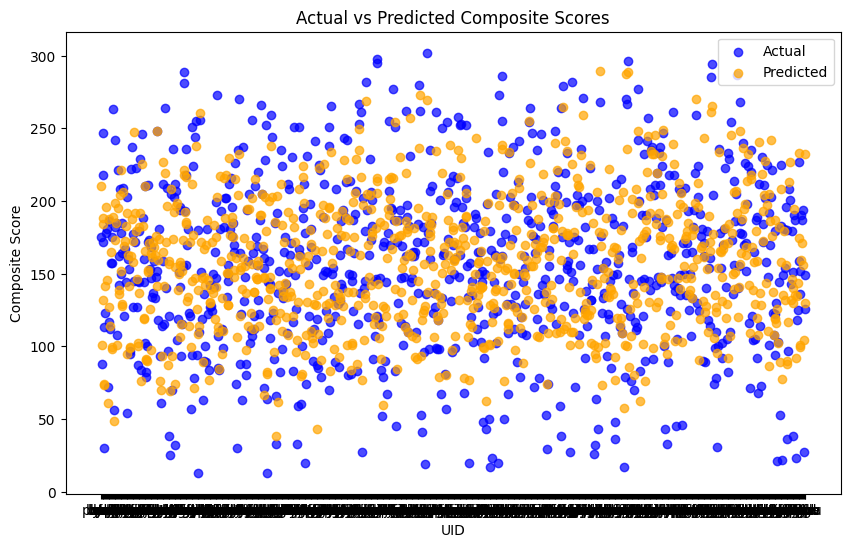

AttributeError: 'TPOTRegressor' object has no attribute '_optimized_pipeline'

In [30]:
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor  # Import TPOT for AutoML
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


X = data.drop(columns=['composite_score'])
y = data['composite_score']

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Preprocessing for X
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# TransformedTargetRegressor for automatic y preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))  # Scale y to range [0, 1]
tpot = TPOTRegressor(
    generations=1,            # Number of generations to run
    population_size=50,       # Size of the population
    verbosity=2,              # Log verbosity
    random_state=42,
    scoring='neg_mean_squared_error'
)

regressor = TransformedTargetRegressor(
    regressor=tpot,           # Use TPOT as the underlying model
    transformer=scaler        # Apply MinMaxScaler to y
)

# Create a pipeline with preprocessing for X
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Fit the pipeline (TPOT internally optimizes the model)
model_pipeline.fit(X_train, y_train)

# Evaluate on validation data
y_pred = model_pipeline.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_val.index, y_val, label='Actual', alpha=0.7, color='blue')
plt.scatter(X_val.index, y_pred, label='Predicted', alpha=0.7, color='orange')
plt.xlabel("UID")
plt.ylabel("Composite Score")
plt.title("Actual vs Predicted Composite Scores")
plt.legend()
plt.show()

# Export the best pipeline
tpot.export('best_pipeline.py')


In [12]:
print(data.isnull().sum())
print(data.shape)


uid                   0
age_03             1456
urban_03           1454
married_03         1454
n_mar_03           1482
                   ... 
a33b_12            4288
a34_12             1601
j11_12               89
year                  0
composite_score       0
Length: 186, dtype: int64
(4343, 186)


In [51]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
print(len(numerical_features) + len(categorical_features))

185


In [49]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
